In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

In [3]:
# Load the CSV data into a Pandas DataFrame
data = pd.read_csv('database.csv', sep=';')

In [4]:
data

,title,keywords,abstract,type,year,Publisher,URL,attributes,metrics,challenges
0,Challenges in HPCQC Integration,Quantum computers; Complex infrastructures; Co...,Quantum computing's potential as an adjunct to...,Conference paper,2023,2023 IEEE International Conference on Quantum ...,https://qce.quantum.ieee.org/2023/,1. scheduling: Ensuring that single tasks do n...,No,The challenges identified for integrating quan...
1,Addressing Temporal Variations in Qubit Qualit...,Quantum Computing; Parameterized Quantum Circu...,The public access to noisy intermediate-scale ...,Conference paper,2019,2019 IEEE/ACM International Symposium on Low P...,https://islped.org/2019/,No,"T1 relaxation time, T2 dephasing time, single-...",No
2,Software quality issues in quantum information...,Quantum computing; Quantum quality environment...,Quantum computing is the technology of the 21s...,Conference paper,2021,2nd Quantum Software and Engineering Workshop ...,"https://dblp.org/db/conf/qce/qset2021.html, ht...",1. verified compilation\n2. verification proto...,"1. power of quantum computing: quantum volume,...",No
3,Research on Quality Model for Quantum Simulato...,Evaluation; Quantum Simulator; Software Quality,"In recent years, the demand for arithmetic pow...",Conference paper,2023,25th IEEE/ACIS International Conference on Sof...,https://acisinternational.org/conferences/snpd...,1. we evaluate the quality of classical softwa...,No,No
4,Challenges and opportunities in quantum machin...,High energy physics; Learning systems; Quantum...,At the intersection of machine learning and qu...,Article,2022,Nature,https://www.nature.com/natcomputsci,No,No,1. Embedding schemes and quantum datasets. The...
5,Studying efficacy of traditional software qual...,Quantum Computing; Software Quality; Quality A...,"Classical computing, which gave us the current...",Article,2022,Springer: Optical and Quantum Electronics,https://link.springer.com/journal/11082,"1. To assess software quality, ISO/IEC (Lin 20...",No,No
6,Quantum service-oriented computing: current la...,Classical services; Hybrid classical-quantum s...,The development that quantum computing technol...,Article,2022,Springer: Software Quality Journal,https://link.springer.com/journal/11219,No,1. number of qubits\n2. number of shots: the ...,1. the nonexistence of algorithms with do-it-y...
7,An exploratory study on the challenges of engi...,Cloud computing; Hybrid quantum applications; ...,The rapid evolution of quantum computation in ...,Conference paper,2021,IEEE: 2nd Quantum Software Engineering and Tec...,https://quset.github.io/qset2021/,No,No,1. the development of hQApps requires a team t...
8,Quantum Services Generation and*Deployment Pro...,Process improvement; Quantum Computing; Quantu...,Quantum computing technology is revolutionizin...,Conference paper,2023,Springer: Communications in Computer and Infor...,"https://2023.quatic.org/, https://www.springer...",No,1. Circuit Size: \nwidth: the maximum number o...,1. given the lack of a clear definition of met...
9,Math and physics tools for quality quantum pro...,Quantum certification; Quantum literacy; Quant...,We are in presence of a quantum computing revo...,Conference paper,2020,Springer: Communications in Computer and Infor...,"https://2020.quatic.org/, https://www.springer...","1. To produce quality quantum software, as wit...",No,No


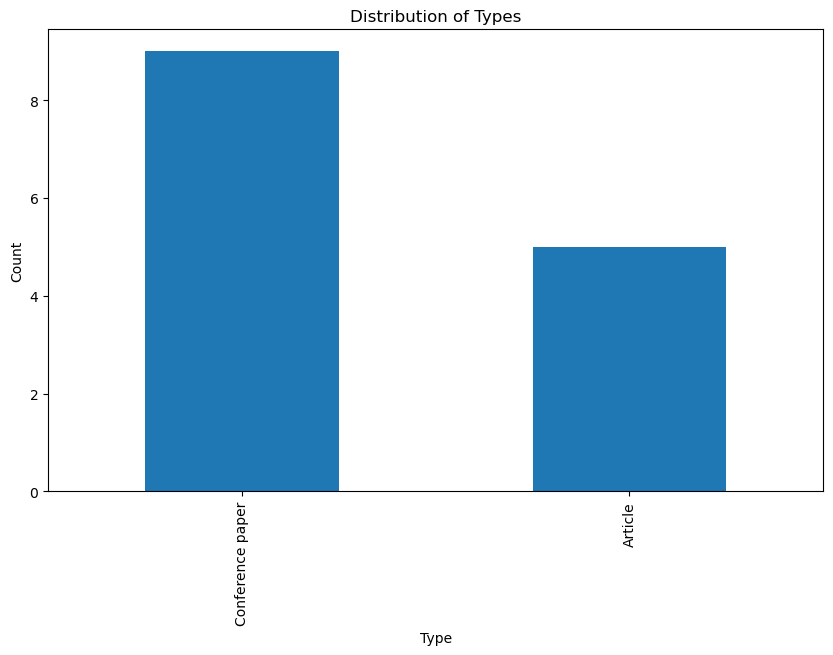

In [5]:
# 1. Column chart displaying data grouped by type
type_counts = data['type'].value_counts()
type_counts.plot(kind='bar', figsize=(10, 6))
plt.title('Distribution of Types')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()

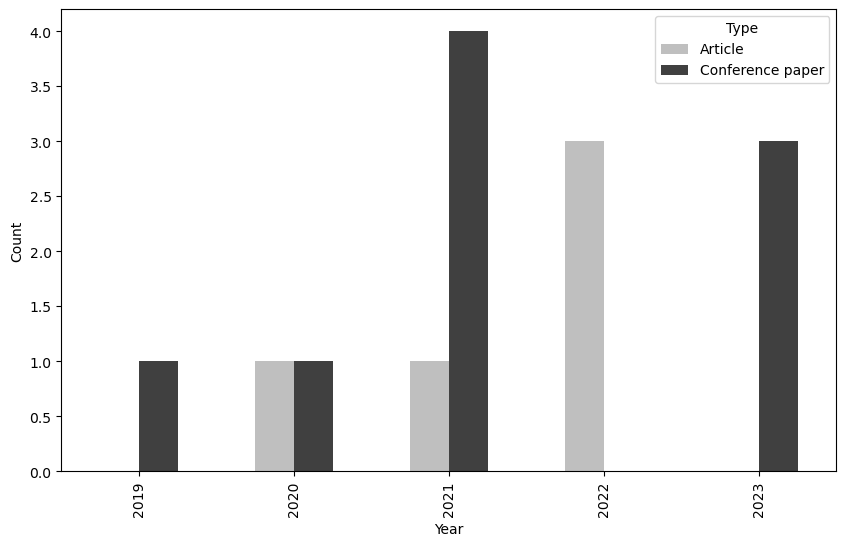

In [26]:
# 2. Chart of types per year
year_type_counts = data.groupby(['year', 'type']).size().unstack('type', fill_value=0)
gray_colors = ['#bfbfbf', '#404040']
year_type_counts.plot(kind='bar', figsize=(10, 6), color=gray_colors)
# plt.title('Types per Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.legend(title='Type')
plt.savefig('by_year')
plt.show()

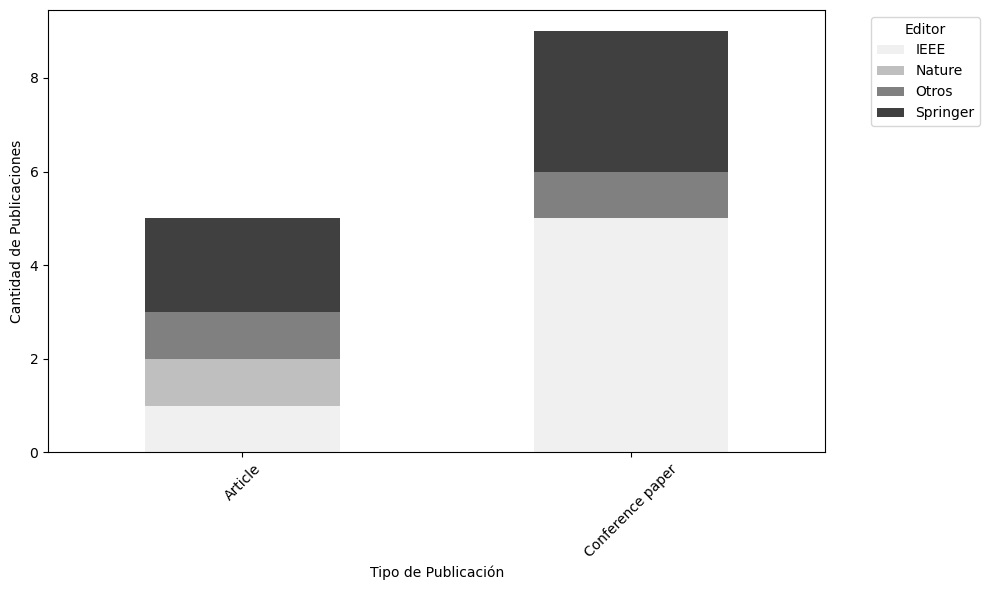

In [27]:
def categorize_publisher(publisher):
    if 'IEEE' in publisher:
        return 'IEEE'
    elif 'Springer' in publisher:
        return 'Springer'
    elif 'Nature' in publisher:
        return 'Nature'
    else:
        return 'Otros'

data['publisher_group'] = data['Publisher'].apply(categorize_publisher)
grouped = data.groupby(['type', 'publisher_group']).size().unstack(fill_value=0)

gray_colors = ['#f0f0f0', '#bfbfbf', '#808080', '#404040']
grouped.plot(kind='bar', stacked=True, figsize=(10, 6), color=gray_colors)

# Añadir títulos y etiquetas
# plt.title('Distribución de Publicaciones por Tipo y Editor')
plt.xlabel('Tipo de Publicación')
plt.ylabel('Cantidad de Publicaciones')
plt.xticks(rotation=45)
plt.legend(title='Editor', bbox_to_anchor=(1.05, 1), loc='upper left')

# Mostrar el gráfico
plt.tight_layout()
plt.savefig('conf_by_editor')
plt.show()

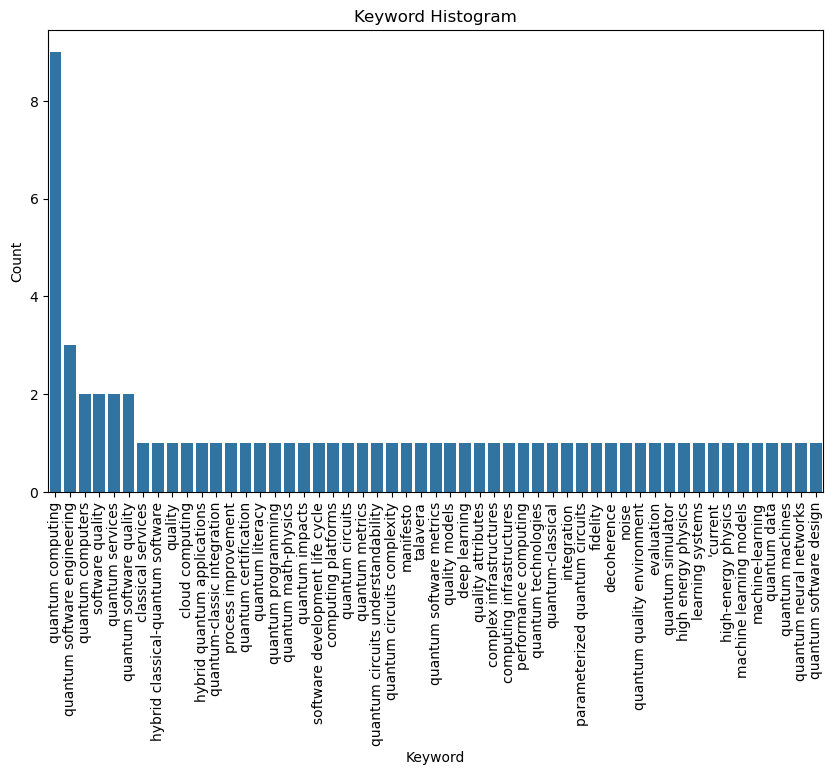

In [7]:
# Extract keywords and create a list of individual keywords
all_keywords = []
for keywords in data['keywords']:
    if pd.notnull(keywords):
        for keyword in keywords.split(';'):
            all_keywords.append(keyword.strip().lower())

# Convert the list of keywords to a Pandas Series
keyword_series = pd.Series(all_keywords)

# Create a DataFrame with keyword counts
keyword_counts = keyword_series.value_counts().reset_index()
keyword_counts.columns = ['Keyword', 'Count']

plt.figure(figsize=(10, 6))
sns.barplot(data=keyword_counts, x='Keyword', y='Count')
plt.title('Keyword Histogram')
plt.xlabel('Keyword')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()